In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\sample_submission.csv")
df

prediction
0    sunflower
1    sunflower
2    sunflower
3    sunflower
4    sunflower
..         ...
919  sunflower
920  sunflower
921  sunflower
922  sunflower
923  sunflower

[924 rows x 1 columns]

In [2]:
df1=pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\Testing_set_flower.csv")
df1

filename
0      Image_1.jpg
1      Image_2.jpg
2      Image_3.jpg
3      Image_4.jpg
4      Image_5.jpg
..             ...
919  Image_920.jpg
920  Image_921.jpg
921  Image_922.jpg
922  Image_923.jpg
923  Image_924.jpg

[924 rows x 1 columns]

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

#model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#Preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [9]:
#pip install opencv-python

In [10]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISEY_DIR=r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\train\daisy"
FLOWER_SUNFLOWER_DIR=r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\train\sunflower"
FLOWER_TULIP_DIR=r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\train\tulip"
FLOWER_DANDI_DIR=r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\train\dandelion"
FLOWER_ROSE_DIR=r"C:\Users\Dell\OneDrive\Desktop\archive (4)\archive (4)\train\rose"


In [11]:
def assign_label(img,flower_type):
    return flower_type

In [12]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        #label=assign_label(img,flower_type)
        label=assign_label(img,flower_type)
        path=os.path.join(DIR,img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [13]:
make_train_data('Daisy',FLOWER_DAISEY_DIR)
print(len(X))

100%|██████████| 501/501 [00:03<00:00, 148.90it/s]

501


In [14]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 495/495 [00:03<00:00, 130.69it/s]

996


In [15]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 557/557 [00:03<00:00, 144.61it/s]

1553


In [16]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 646/646 [00:04<00:00, 153.56it/s]

2199


In [17]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 497/497 [00:03<00:00, 141.84it/s]

2696


In [18]:
print(X)

[array([[[224, 216, 215],
        [220, 213, 209],
        [226, 217, 214],
        ...,
        [ 14,   9,   9],
        [ 17,  11,  12],
        [ 12,   7,   8]],

       [[225, 217, 216],
        [231, 223, 221],
        [224, 216, 215],
        ...,
        [ 15,  12,  13],
        [ 13,   7,   9],
        [ 12,   8,   7]],

       [[235, 227, 227],
        [231, 223, 220],
        [229, 223, 222],
        ...,
        [ 16,  14,  14],
        [ 13,   7,   9],
        [  8,   4,   3]],

       ...,

       [[182, 176, 177],
        [188, 183, 184],
        [202, 198, 194],
        ...,
        [138, 154, 160],
        [159, 169, 174],
        [166, 172, 182]],

       [[221, 216, 212],
        [228, 224, 216],
        [230, 226, 221],
        ...,
        [136, 153, 162],
        [159, 171, 179],
        [162, 170, 180]],

       [[237, 231, 229],
        [235, 228, 225],
        [241, 236, 232],
        ...,
        [138, 152, 161],
        [155, 171, 179],
        [160, 166, 179]

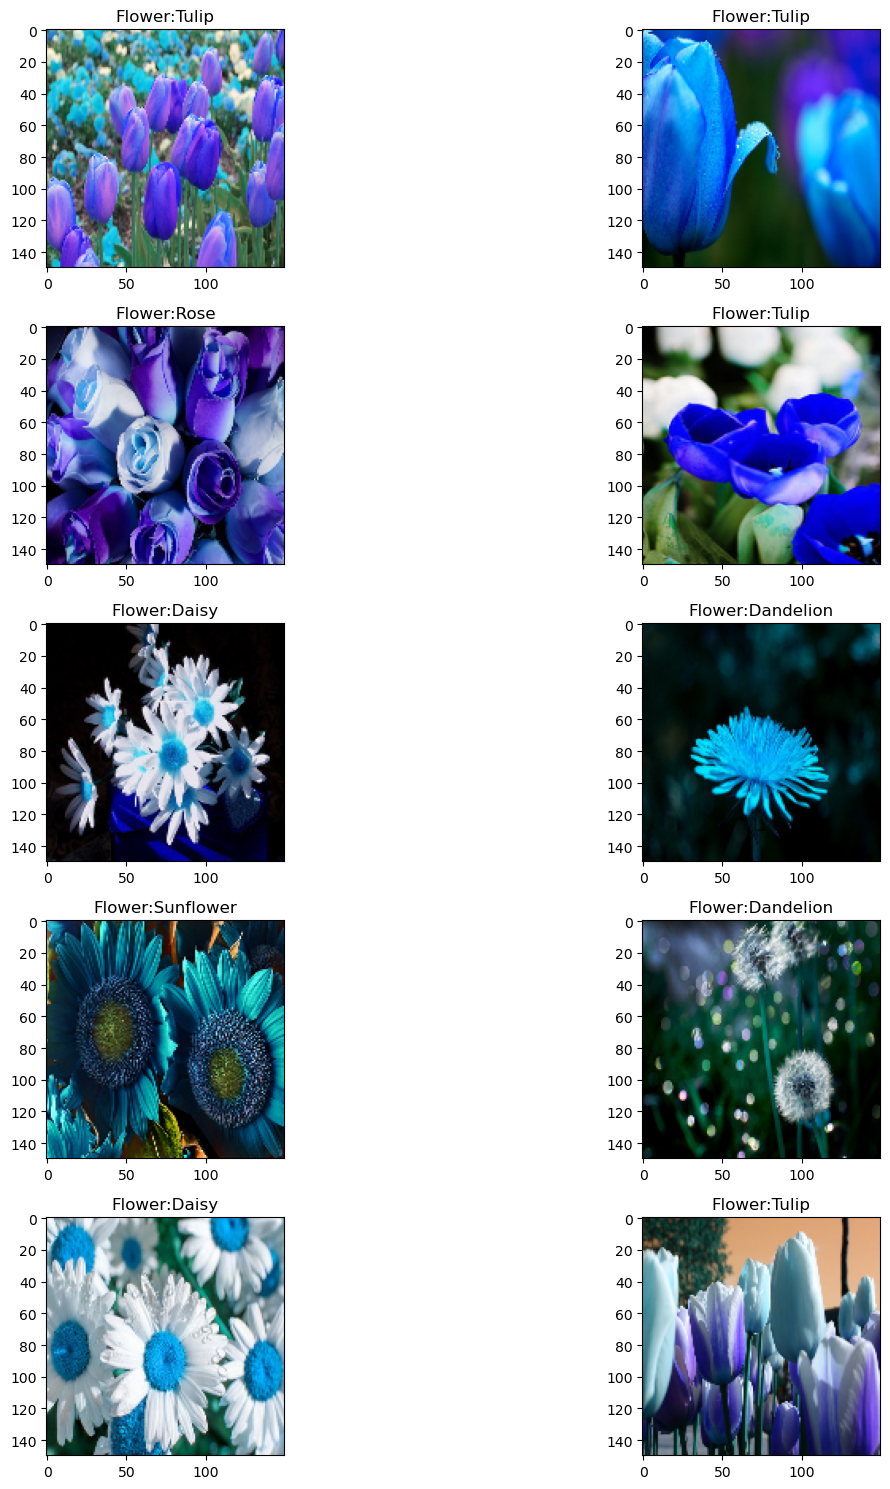

In [19]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)

for row in range(5):
    for col in range(2):
        l=rn.randint(0,len(Z))
        ax[row, col].imshow(X[l])
        ax[row, col].set_title("Flower:"+Z[l])
plt.tight_layout()

In [20]:
#Encoding all the flower names
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255
#X->contains all the image array
#y->contains all the image name
print(X)

[[[[0.87843137 0.84705882 0.84313725]
   [0.8627451  0.83529412 0.81960784]
   [0.88627451 0.85098039 0.83921569]
   ...
   [0.05490196 0.03529412 0.03529412]
   [0.06666667 0.04313725 0.04705882]
   [0.04705882 0.02745098 0.03137255]]

  [[0.88235294 0.85098039 0.84705882]
   [0.90588235 0.8745098  0.86666667]
   [0.87843137 0.84705882 0.84313725]
   ...
   [0.05882353 0.04705882 0.05098039]
   [0.05098039 0.02745098 0.03529412]
   [0.04705882 0.03137255 0.02745098]]

  [[0.92156863 0.89019608 0.89019608]
   [0.90588235 0.8745098  0.8627451 ]
   [0.89803922 0.8745098  0.87058824]
   ...
   [0.0627451  0.05490196 0.05490196]
   [0.05098039 0.02745098 0.03529412]
   [0.03137255 0.01568627 0.01176471]]

  ...

  [[0.71372549 0.69019608 0.69411765]
   [0.7372549  0.71764706 0.72156863]
   [0.79215686 0.77647059 0.76078431]
   ...
   [0.54117647 0.60392157 0.62745098]
   [0.62352941 0.6627451  0.68235294]
   [0.65098039 0.6745098  0.71372549]]

  [[0.86666667 0.84705882 0.83137255]
   [0.8

In [21]:
print(Y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [22]:
#spliting to test and train dataset
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
print(Z)

['Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 'Daisy', 

In [24]:
#set random seed
np.random.seed(42)
rn.seed(42)

tf.random.set_seed(42)

In [27]:
#Building the model
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


#1 2 3 4
#5 6 7 8
#9 10 11 12
#13 14 15 16

#MaxPooling -->2x2
#6 8
#14 16


In [28]:
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


In [29]:
model.add(Conv2D(filters=96,kernel_size=(3,3),padding='same',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


In [30]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5,activation='softmax'))

In [31]:
#Adjest the learning rate
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0)

In [32]:
#To prevent overfitting
datagen=ImageDataGenerator(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True,
vertical_flip=False)
datagen.fit(x_train)

In [ ]:
#compile keras model
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.compile

In [ ]:
#fitting on training and making predictions
History=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,validation_data=(x_test,y_test),verbose=1,steps_per_epoch=x_train.shape[0]//batch_size)